In [1]:
import heapq as hq
import networkx as nx
import matplotlib.pyplot as plt
from random import shuffle

class Event:
    def __init__(self, time, action, bm):
        self.time = time
        self.action = action
        self.bm = bm
    def __lt__(self, other):
        return (self.time, self.bm) < (other.time, other.bm)
    def __le__(self, other):
        return (self.time, self.bm) <= (other.time, other.bm)

def shuffle0(passengers):
    for i in range(len(passengers)):
        x = [j for j in range(len(passengers[i]))]
        shuffle(x)
        passengers[i] = [passengers[i][k] for k in x]

def calc_pic(grah,color_list):
    nx.draw_kamada_kawai(graph, with_labels = True, node_color = color_list)

/home/phil/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


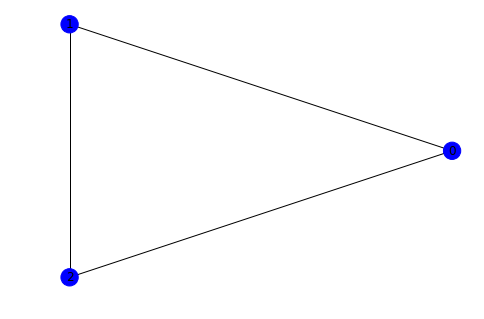

In [2]:
graph = nx.Graph()

graph.add_node(0)
graph.add_node(1)
graph.add_node(2)

graph.add_edge(0,1)
graph.add_edge(1,2)
graph.add_edge(0,2)

color_list = ['blue']*3
calc_pic(graph, color_list)
plt.savefig('img/time.png')

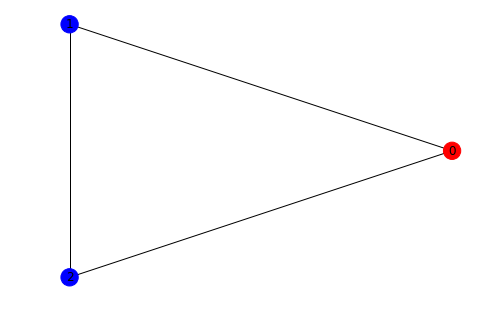

In [3]:
color_list[0] = 'red'
calc_pic(graph, color_list)

In [4]:
ListeNodes = list(graph.node)
def solve(eventq, passengers, bms):
    #save(passengers, bms)
    while eventq:
        if ([len(passengers[i]) == 0 for i in range(len(passengers))] == [True]*len(passengers)) and ([bms[i]['n_passengers'] == 0 for i in range(len(bms))] == [True]*len(bms)):
            return print('Ende')
        event = hq.heappop(eventq)
        bm = bms[event.bm]
        current_node = bm['itinerary'][bm['stop'] % len(bm['itinerary'])]
        next_node = bm['itinerary'][(bm['stop']+1) % len(bm['itinerary'])]
        current_node_time_idx = (bm['stop'] % len(bm['itinerary']))%len(bm['t_times'])
        
        color_list[current_node] = bm['color']
        calc_pic(graph, color_list)
        plt.savefig("img/{}.png".format(event.time))
        plt.show()
        color_list[current_node] = 'blue'
        
        print('Fahrzeug {} ist am Knoten {}, der nächste Halt {}'.format(bm['name'],current_node, next_node))
        if event.action == 'load':
            free = bm['capacity'] - bm['n_passengers']
            print('Fahrzeug {} load'.format(bm['name']))
            print('Fahrzeug {} hat {} Plätze frei'.format(bm['name'],free))
            while bm['n_passengers'] < bm['capacity']:
                waiting = [idx for idx, passenger in enumerate(passengers[current_node]) if passenger['station'] in bm['itinerary']]
                #print('Warten: {}'.format(waiting))
                if not waiting:
                    break
                passenger = passengers[current_node].pop(waiting[0])
                print('Passagier:', passenger)
                bm['n_passengers'] += 1
                hq.heappush(eventq, Event(event.time + passenger['exit_time'],'exit', event.bm))
                print('time:', event.time+passenger['exit_time'])
            hq.heappush(eventq, Event(event.time + bm['t_times'][current_node_time_idx], 'load', event.bm))
            bm['stop'] += 1
        # Generate events for exiting passengers
        elif event.action == 'exit':
            print('Fahrzeug {}, Passagiere steigenaus, time {}'.format(bm['name'], event.time))
            bm['n_passengers'] -= 1
            print('Es sind {} Passagiere in der Bahn'.format(bm['n_passengers']))
        else:
            raise Exception('Unknown event action')



# G = nx.Graph()
G.add_node('Hbf')
G.add_node('INF')
G.add_node('Phil')
G.add_node('Bism')
G.add_node('Uni')
G.add_node('Hand')
G.add_node('Rohr')
G.add_node('Zieg')
#Rundfahrt
G.add_edge('INF', 'Hbf')
G.add_edge('Phil', 'INF')
G.add_edge('Uni', 'Phil')
G.add_edge('Bism', 'Uni')
G.add_edge('Hbf', 'Bism')
#Zubringer
G.add_edge('INF', 'Hand')
G.add_edge('Hbf', 'Rohr')
G.add_edge('Uni', 'Zieg')

In [5]:
passengers = [#
    [{'station': 1, 'exit_time': 10}]*20 + [{'station': 2, 'exit_time': 20}]*20,  # 0 => Station 'A'
    [{'station': 0, 'exit_time': 20}]*20 + [{'station': 2, 'exit_time': 10}]*20, # 1 => Station 'B'
    [{'station': 0, 'exit_time': 10}]*20 + [{'station': 1, 'exit_time': 20}]*20  # 2 => Station 'C'
              ]#
bms = [{'color': '#fff0f0', 'n_passengers': 0, 'capacity': 5, 'stop': 0, 'itinerary': [2, 1, 0], 'name': 0, 't_times': [12, 12, 12]},
    #{'n_passengers': 0, 'capacity': 5, 'stop': 0, 'itinerary': [0, 1, 2, 1], 'name': 1, 't_times': [12, 12, 12]}
       ]#

 
# shuffle passengers
shuffle0(passengers)


event0 = Event(0,'load',0)
#event1 = Event(0,'load',1)
eventq = []
hq.heappush(eventq, event0)
#hq.heappush(eventq, event1)

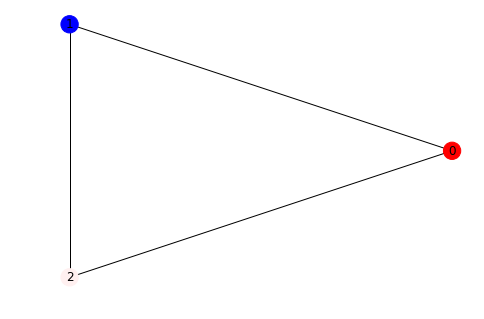

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 5 Plätze frei
Passagier: {'station': 0, 'exit_time': 10}
time: 10
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 0, 'exit_time': 10}
time: 10
Passagier: {'station': 0, 'exit_time': 10}
time: 10
Passagier: {'station': 0, 'exit_time': 10}
time: 10


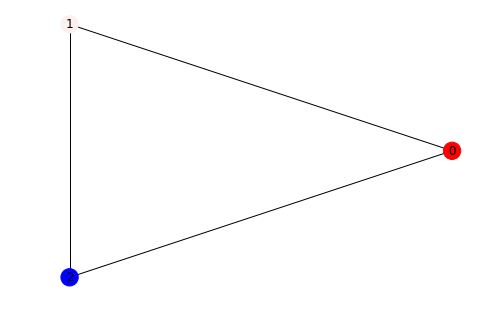

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 10
Es sind 4 Passagiere in der Bahn


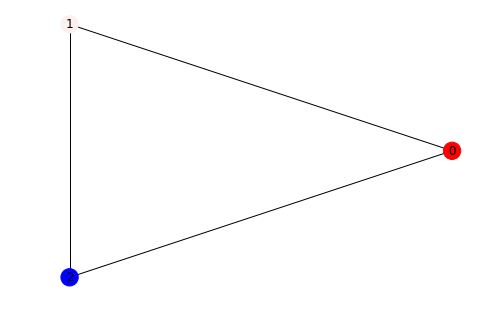

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 10
Es sind 3 Passagiere in der Bahn


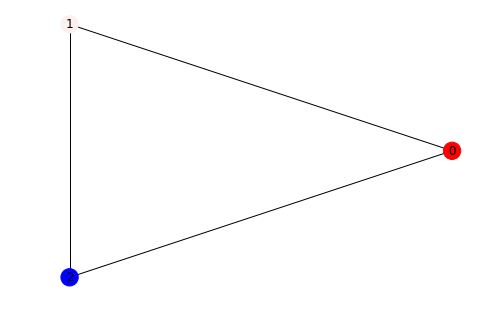

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 10
Es sind 2 Passagiere in der Bahn


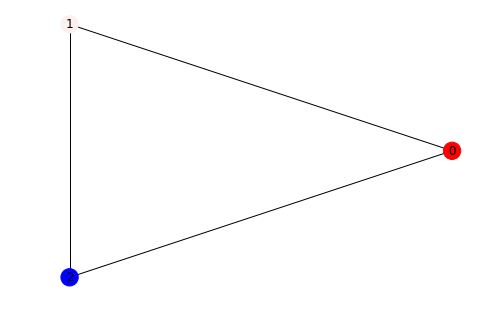

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 10
Es sind 1 Passagiere in der Bahn


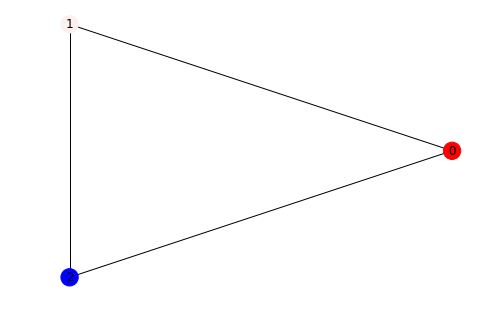

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 0, 'exit_time': 20}
time: 32
Passagier: {'station': 2, 'exit_time': 10}
time: 22
Passagier: {'station': 2, 'exit_time': 10}
time: 22
Passagier: {'station': 2, 'exit_time': 10}
time: 22


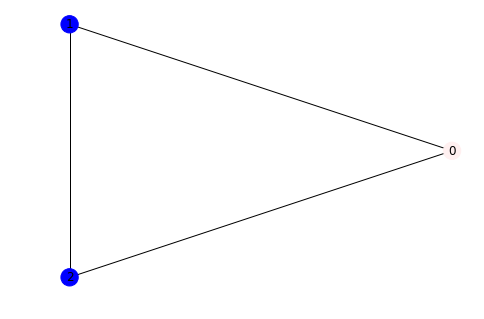

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 20
Es sind 4 Passagiere in der Bahn


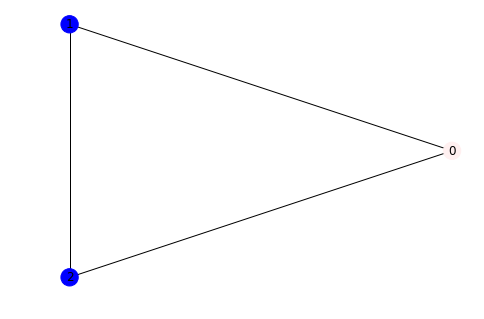

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 22
Es sind 3 Passagiere in der Bahn


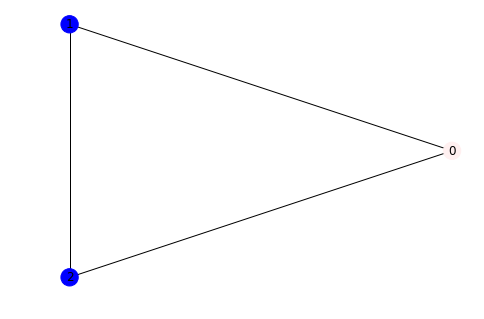

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 22
Es sind 2 Passagiere in der Bahn


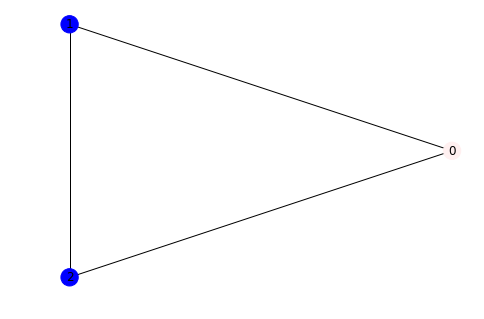

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 22
Es sind 1 Passagiere in der Bahn


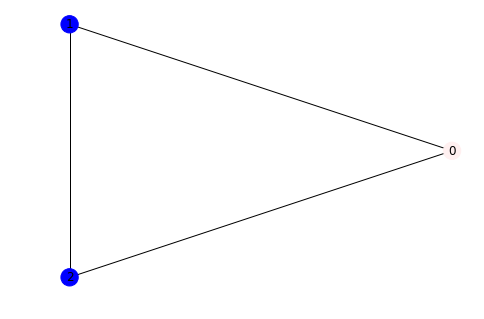

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 2, 'exit_time': 20}
time: 44
Passagier: {'station': 2, 'exit_time': 20}
time: 44
Passagier: {'station': 2, 'exit_time': 20}
time: 44
Passagier: {'station': 1, 'exit_time': 10}
time: 34


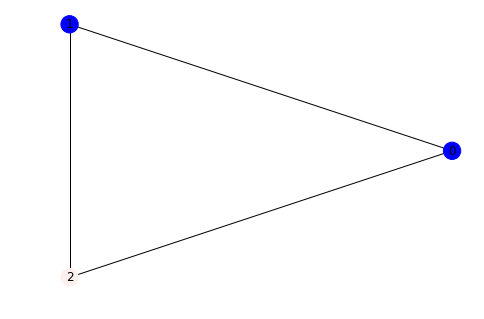

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 32
Es sind 4 Passagiere in der Bahn


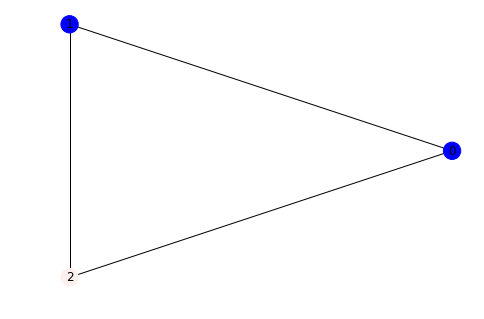

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 34
Es sind 3 Passagiere in der Bahn


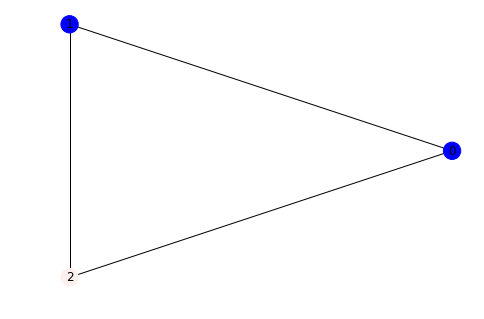

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 2 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 56
Passagier: {'station': 1, 'exit_time': 20}
time: 56


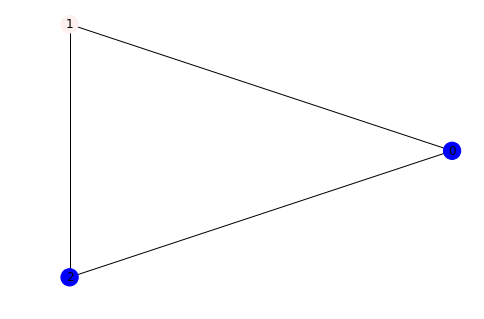

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 44
Es sind 4 Passagiere in der Bahn


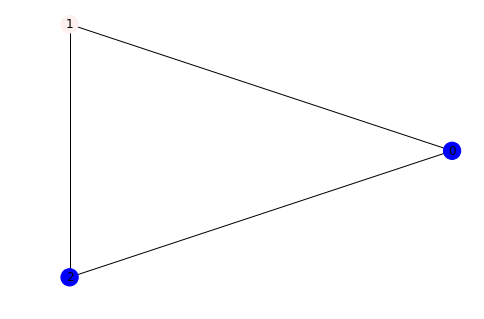

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 44
Es sind 3 Passagiere in der Bahn


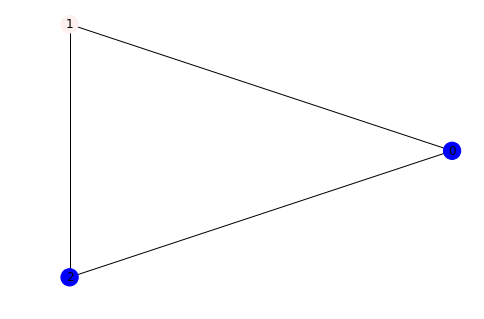

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 44
Es sind 2 Passagiere in der Bahn


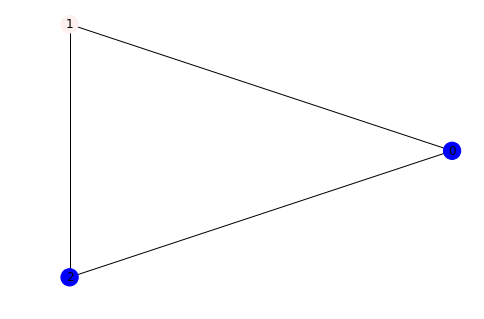

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 0, 'exit_time': 20}
time: 68
Passagier: {'station': 0, 'exit_time': 20}
time: 68
Passagier: {'station': 0, 'exit_time': 20}
time: 68


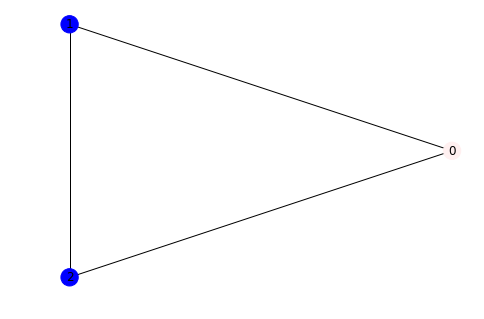

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 56
Es sind 4 Passagiere in der Bahn


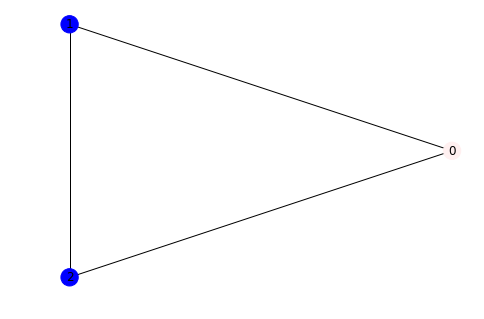

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 56
Es sind 3 Passagiere in der Bahn


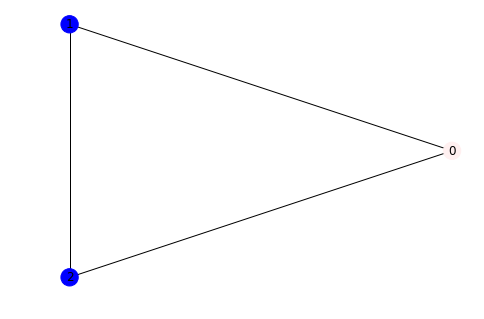

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0 load
Fahrzeug 0 hat 2 Plätze frei
Passagier: {'station': 2, 'exit_time': 20}
time: 80
Passagier: {'station': 2, 'exit_time': 20}
time: 80


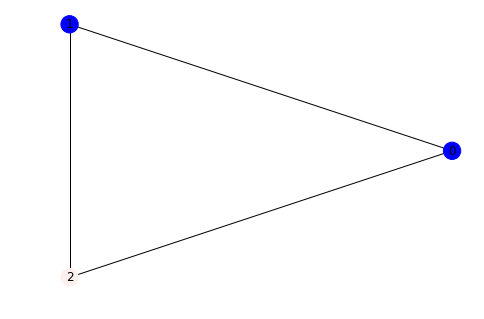

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 68
Es sind 4 Passagiere in der Bahn


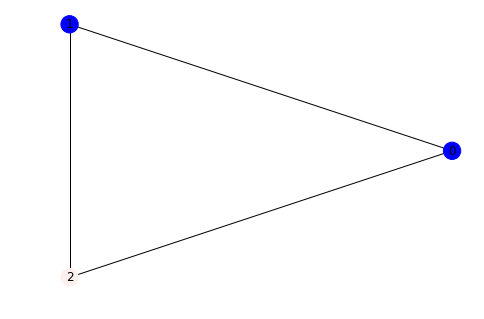

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 68
Es sind 3 Passagiere in der Bahn


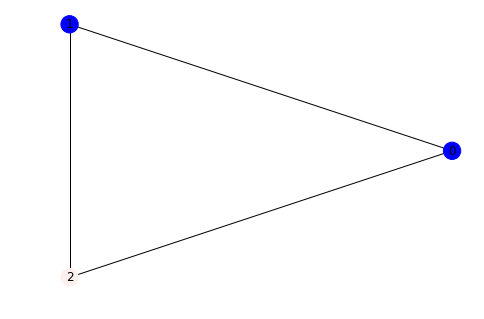

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 68
Es sind 2 Passagiere in der Bahn


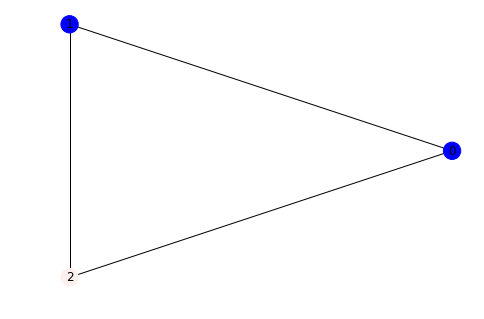

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 92
Passagier: {'station': 0, 'exit_time': 10}
time: 82
Passagier: {'station': 1, 'exit_time': 20}
time: 92


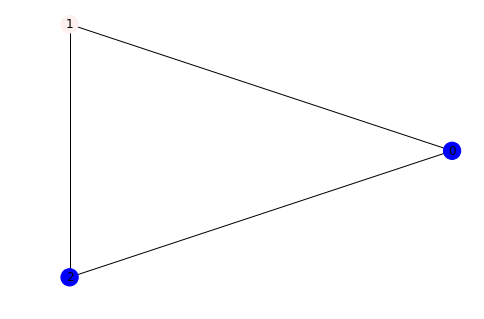

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 80
Es sind 4 Passagiere in der Bahn


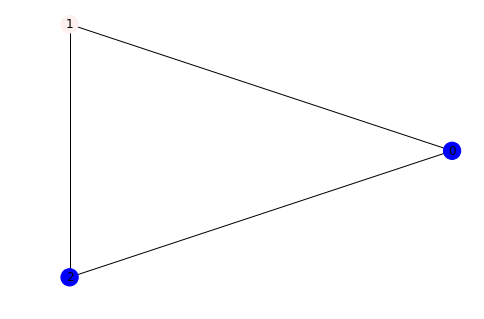

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 80
Es sind 3 Passagiere in der Bahn


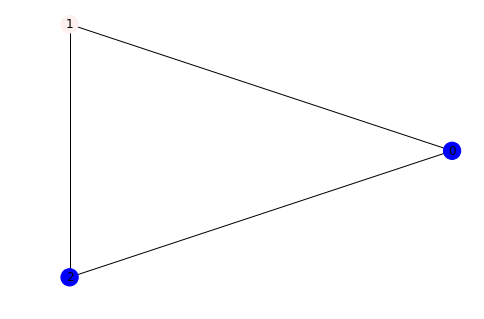

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 82
Es sind 2 Passagiere in der Bahn


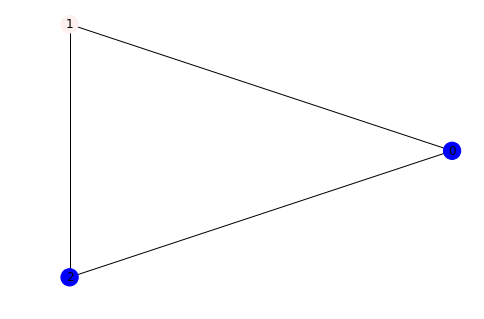

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 0, 'exit_time': 20}
time: 104
Passagier: {'station': 0, 'exit_time': 20}
time: 104
Passagier: {'station': 0, 'exit_time': 20}
time: 104


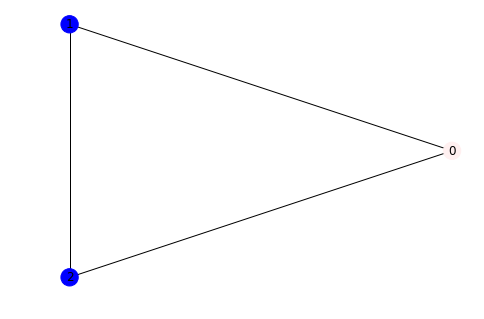

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 92
Es sind 4 Passagiere in der Bahn


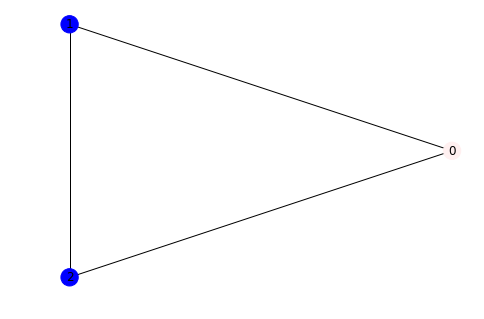

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 92
Es sind 3 Passagiere in der Bahn


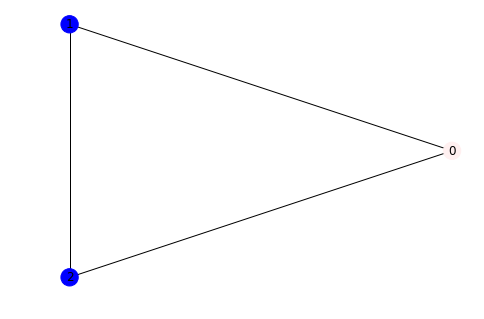

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0 load
Fahrzeug 0 hat 2 Plätze frei
Passagier: {'station': 2, 'exit_time': 20}
time: 116
Passagier: {'station': 2, 'exit_time': 20}
time: 116


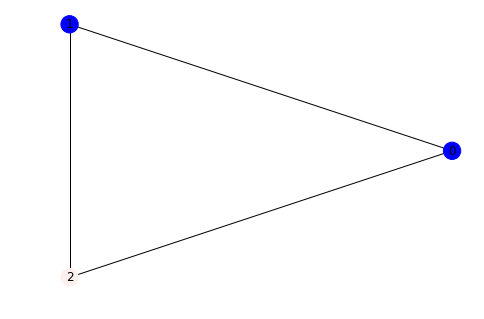

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 104
Es sind 4 Passagiere in der Bahn


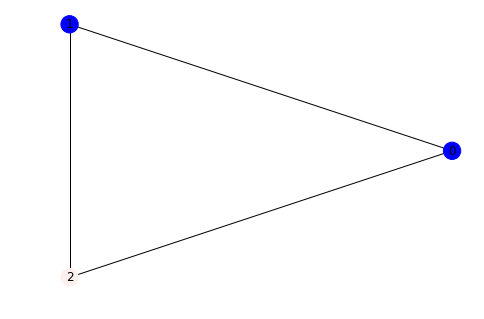

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 104
Es sind 3 Passagiere in der Bahn


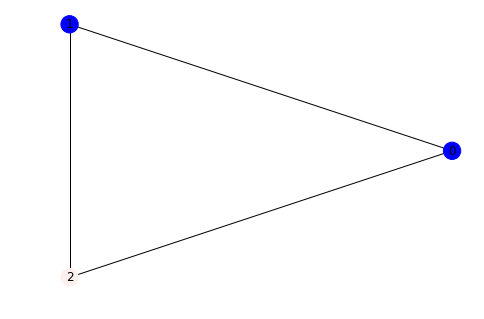

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 104
Es sind 2 Passagiere in der Bahn


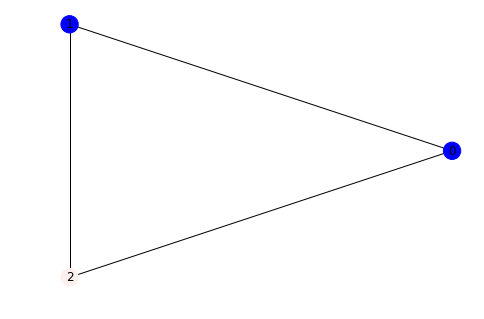

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 0, 'exit_time': 10}
time: 118
Passagier: {'station': 0, 'exit_time': 10}
time: 118
Passagier: {'station': 1, 'exit_time': 20}
time: 128


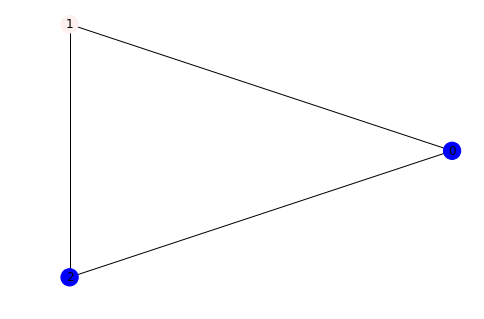

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 116
Es sind 4 Passagiere in der Bahn


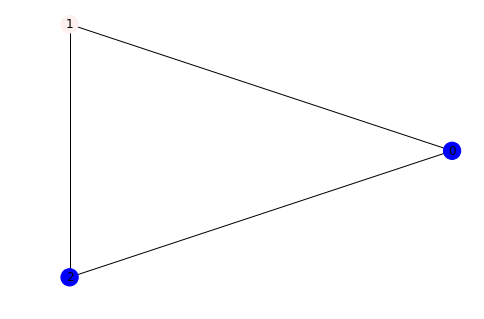

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 116
Es sind 3 Passagiere in der Bahn


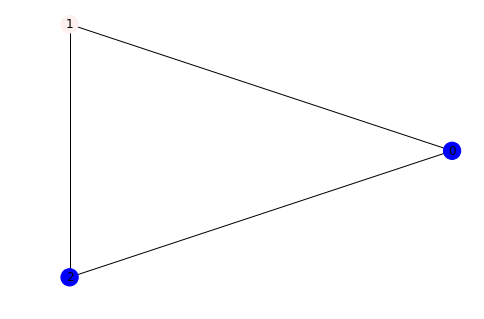

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 118
Es sind 2 Passagiere in der Bahn


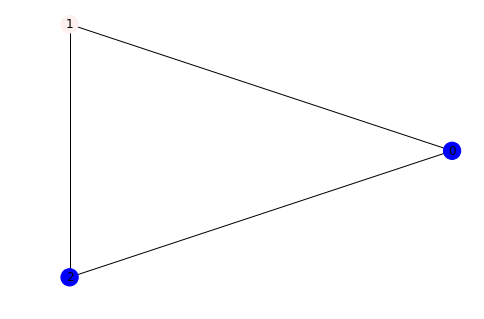

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 118
Es sind 1 Passagiere in der Bahn


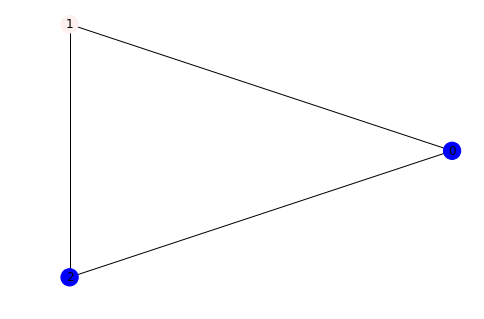

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 0, 'exit_time': 20}
time: 140
Passagier: {'station': 2, 'exit_time': 10}
time: 130
Passagier: {'station': 2, 'exit_time': 10}
time: 130
Passagier: {'station': 0, 'exit_time': 20}
time: 140


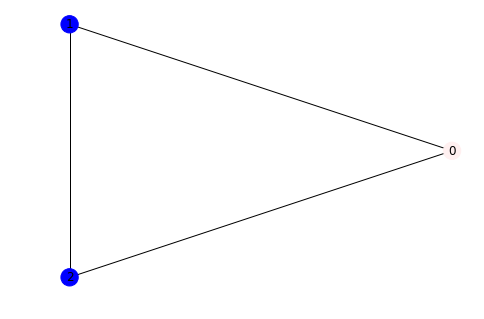

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 128
Es sind 4 Passagiere in der Bahn


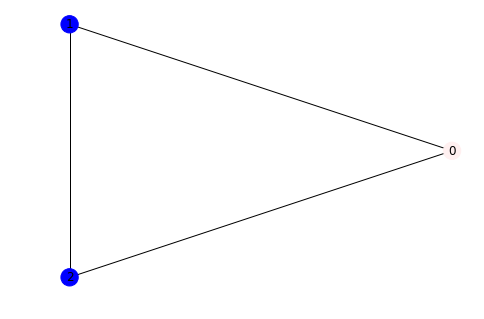

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 130
Es sind 3 Passagiere in der Bahn


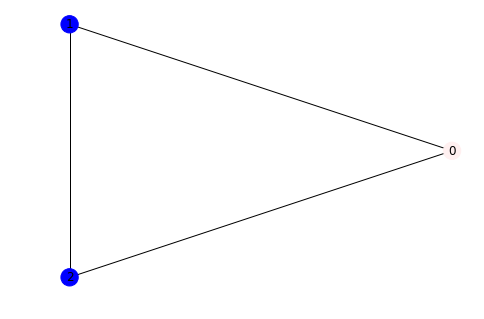

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 130
Es sind 2 Passagiere in der Bahn


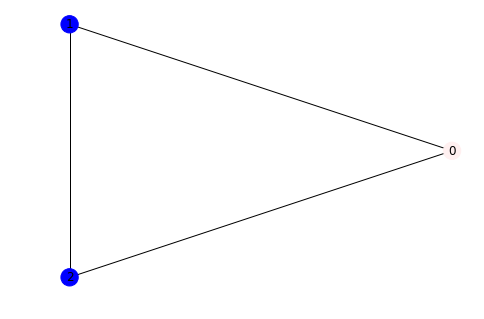

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 1, 'exit_time': 10}
time: 142
Passagier: {'station': 1, 'exit_time': 10}
time: 142
Passagier: {'station': 2, 'exit_time': 20}
time: 152


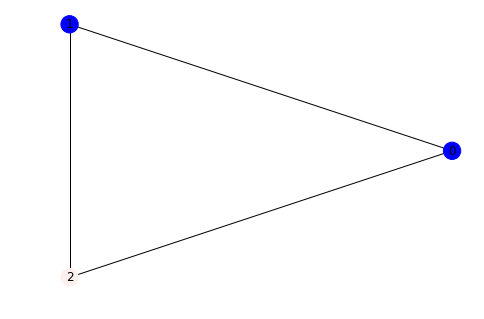

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 140
Es sind 4 Passagiere in der Bahn


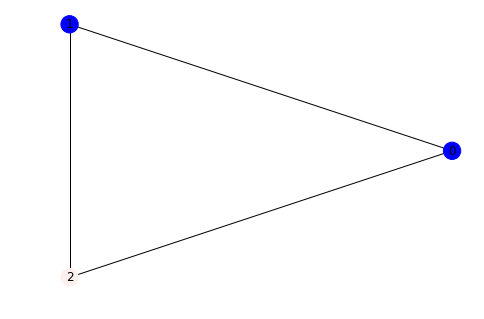

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 140
Es sind 3 Passagiere in der Bahn


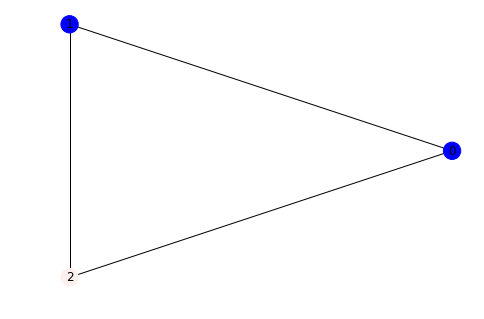

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 142
Es sind 2 Passagiere in der Bahn


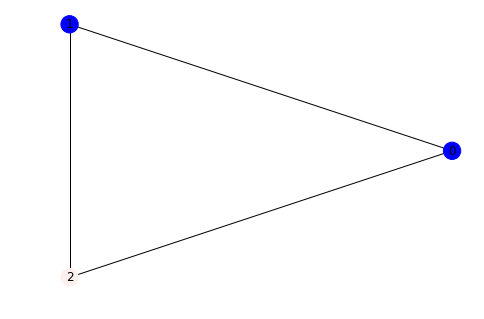

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 142
Es sind 1 Passagiere in der Bahn


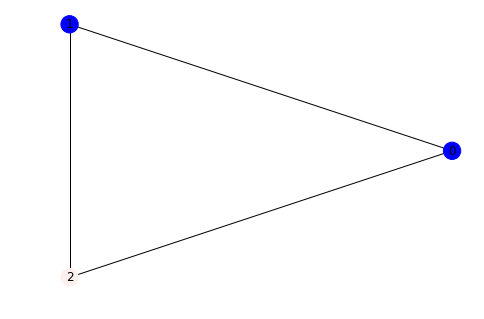

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 164
Passagier: {'station': 0, 'exit_time': 10}
time: 154
Passagier: {'station': 0, 'exit_time': 10}
time: 154
Passagier: {'station': 1, 'exit_time': 20}
time: 164


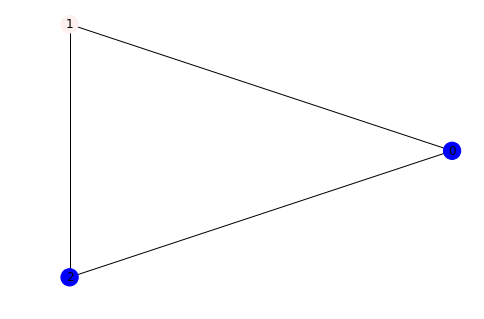

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 152
Es sind 4 Passagiere in der Bahn


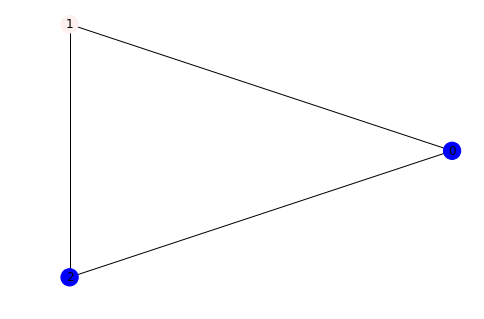

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 154
Es sind 3 Passagiere in der Bahn


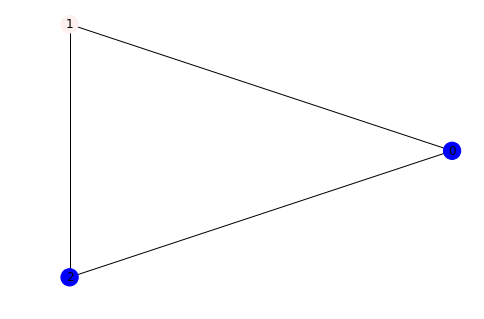

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 154
Es sind 2 Passagiere in der Bahn


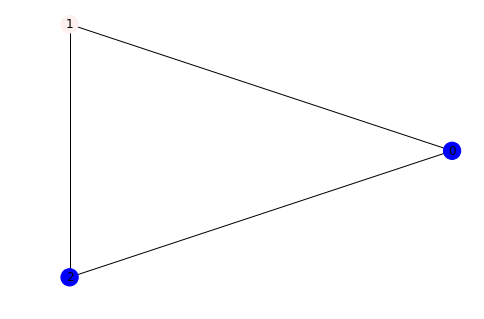

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 166
Passagier: {'station': 2, 'exit_time': 10}
time: 166
Passagier: {'station': 2, 'exit_time': 10}
time: 166


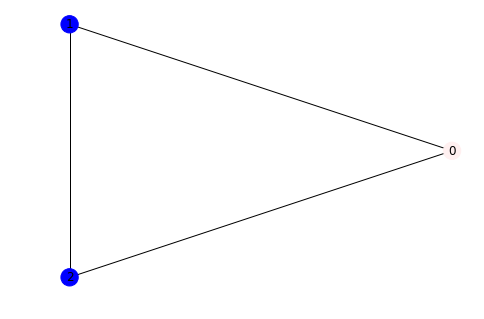

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 164
Es sind 4 Passagiere in der Bahn


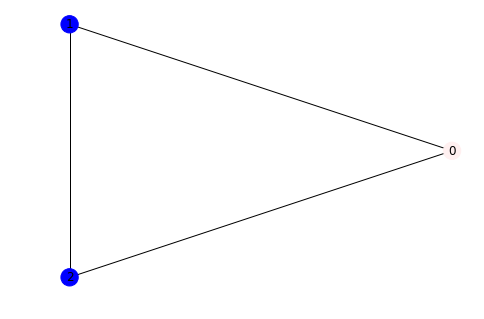

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 164
Es sind 3 Passagiere in der Bahn


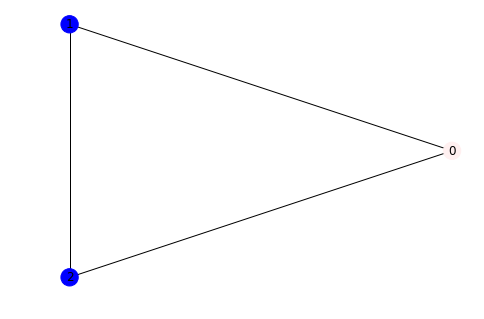

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 166
Es sind 2 Passagiere in der Bahn


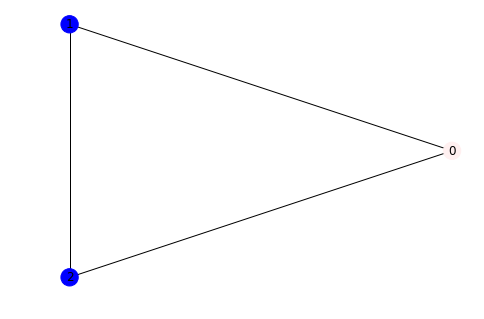

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 166
Es sind 1 Passagiere in der Bahn


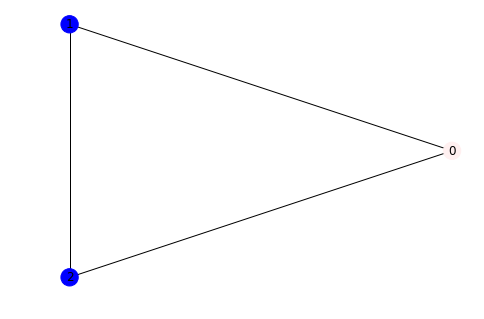

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 166
Es sind 0 Passagiere in der Bahn


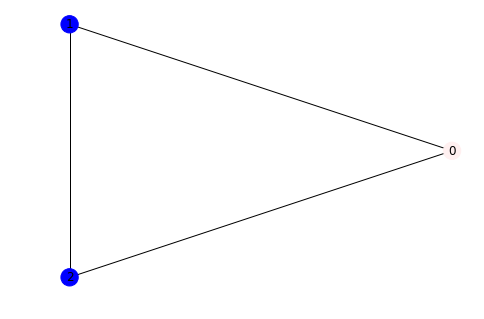

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0 load
Fahrzeug 0 hat 5 Plätze frei
Passagier: {'station': 2, 'exit_time': 20}
time: 188
Passagier: {'station': 1, 'exit_time': 10}
time: 178
Passagier: {'station': 1, 'exit_time': 10}
time: 178
Passagier: {'station': 1, 'exit_time': 10}
time: 178
Passagier: {'station': 2, 'exit_time': 20}
time: 188


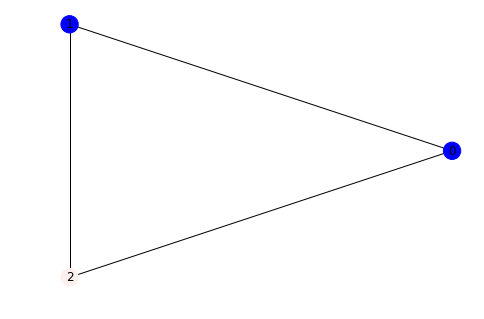

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 178
Es sind 4 Passagiere in der Bahn


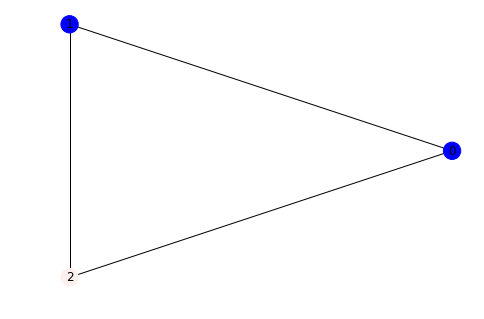

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 178
Es sind 3 Passagiere in der Bahn


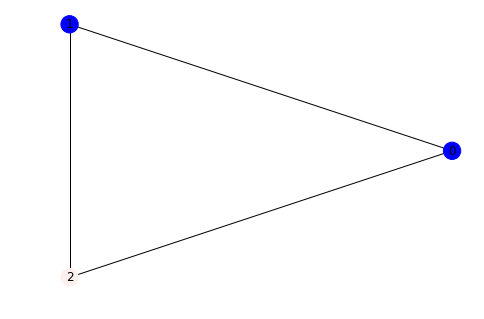

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 178
Es sind 2 Passagiere in der Bahn


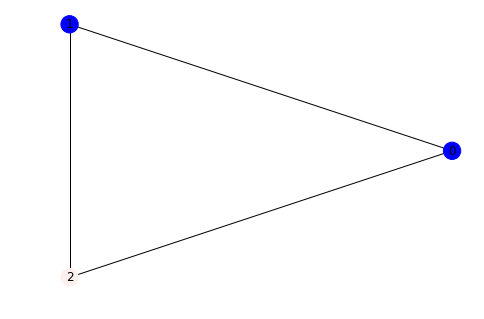

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 200
Passagier: {'station': 1, 'exit_time': 20}
time: 200
Passagier: {'station': 1, 'exit_time': 20}
time: 200


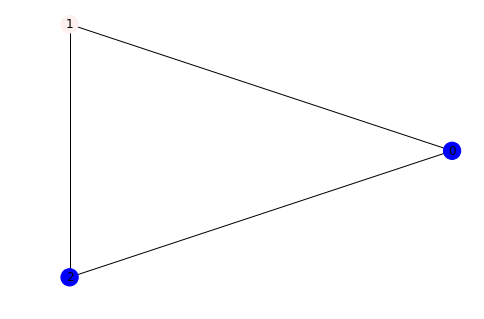

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 188
Es sind 4 Passagiere in der Bahn


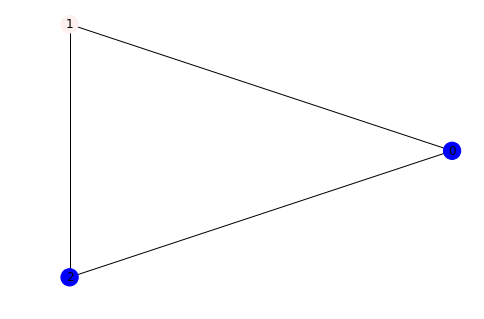

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 188
Es sind 3 Passagiere in der Bahn


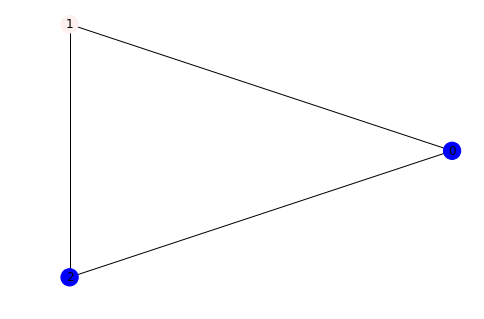

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0 load
Fahrzeug 0 hat 2 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 202
Passagier: {'station': 0, 'exit_time': 20}
time: 212


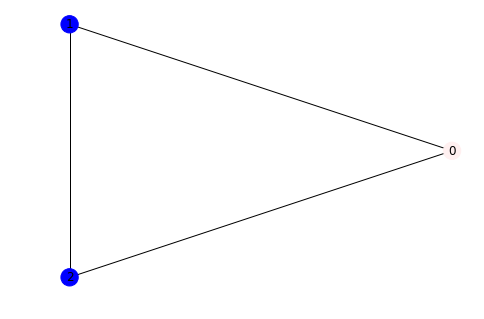

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 200
Es sind 4 Passagiere in der Bahn


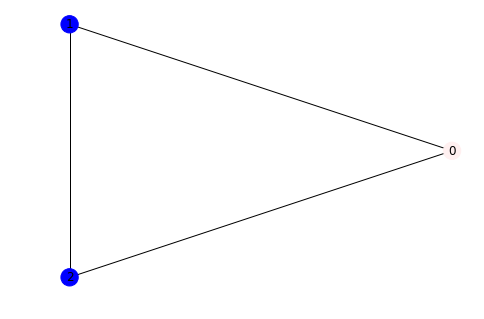

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 200
Es sind 3 Passagiere in der Bahn


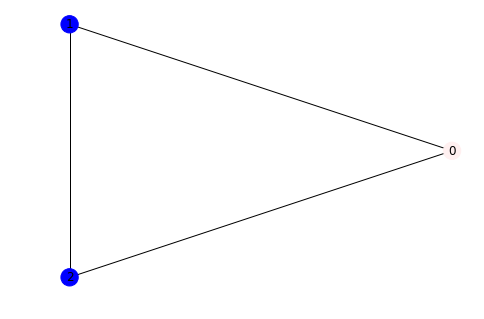

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 200
Es sind 2 Passagiere in der Bahn


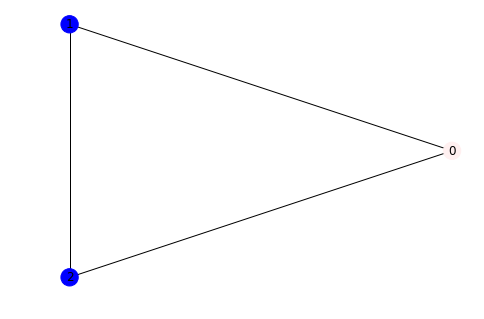

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 202
Es sind 1 Passagiere in der Bahn


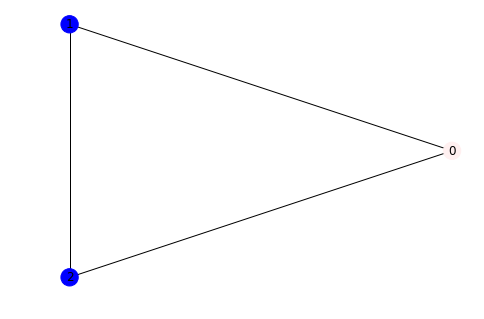

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 2, 'exit_time': 20}
time: 224
Passagier: {'station': 1, 'exit_time': 10}
time: 214
Passagier: {'station': 1, 'exit_time': 10}
time: 214
Passagier: {'station': 2, 'exit_time': 20}
time: 224


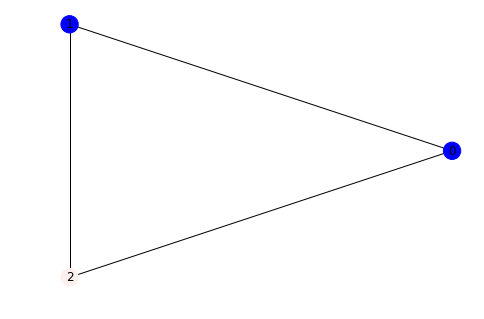

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 212
Es sind 4 Passagiere in der Bahn


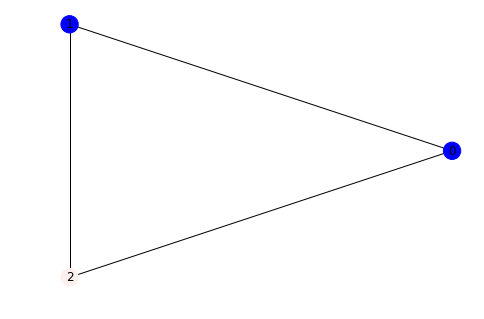

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 214
Es sind 3 Passagiere in der Bahn


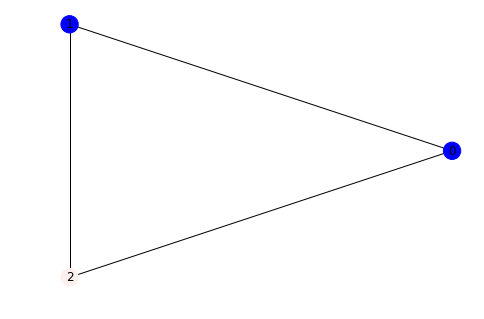

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 214
Es sind 2 Passagiere in der Bahn


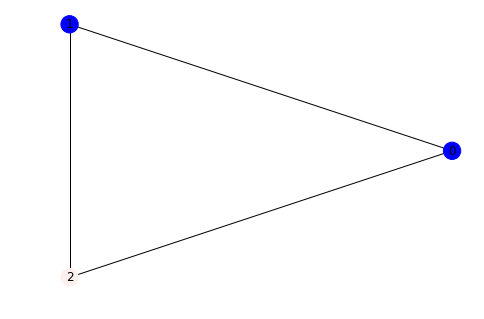

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 236
Passagier: {'station': 0, 'exit_time': 10}
time: 226
Passagier: {'station': 1, 'exit_time': 20}
time: 236


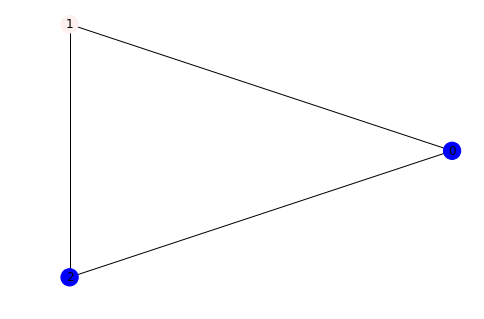

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 224
Es sind 4 Passagiere in der Bahn


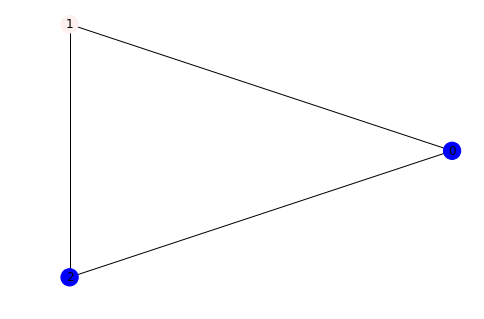

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 224
Es sind 3 Passagiere in der Bahn


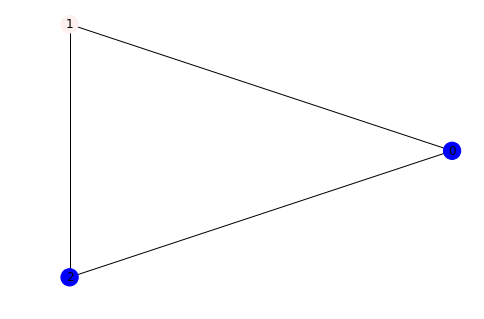

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 226
Es sind 2 Passagiere in der Bahn


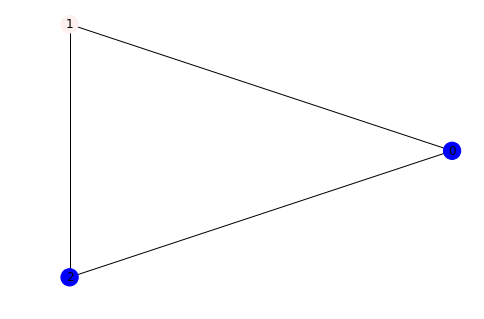

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 0, 'exit_time': 20}
time: 248
Passagier: {'station': 0, 'exit_time': 20}
time: 248
Passagier: {'station': 2, 'exit_time': 10}
time: 238


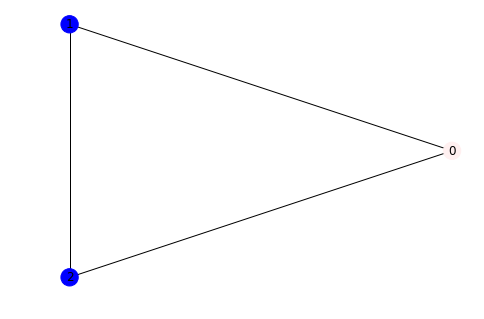

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 236
Es sind 4 Passagiere in der Bahn


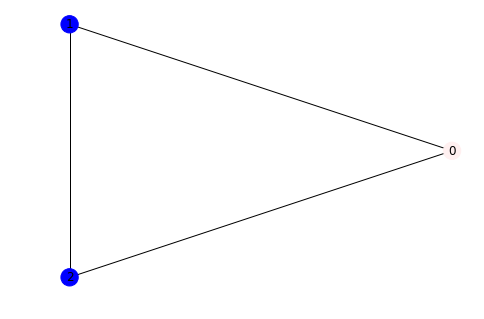

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 236
Es sind 3 Passagiere in der Bahn


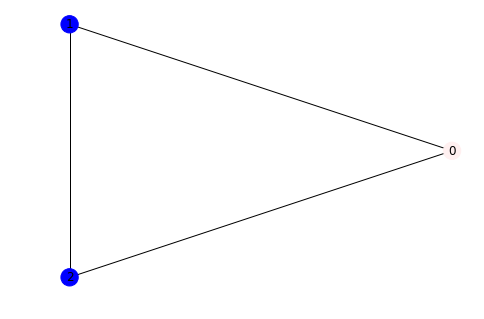

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 238
Es sind 2 Passagiere in der Bahn


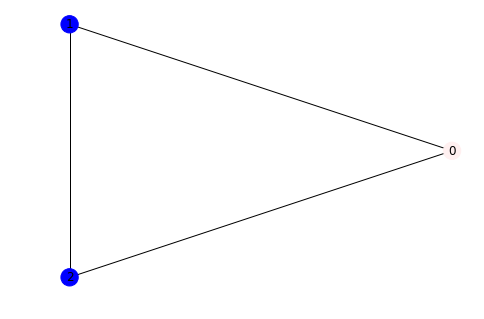

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 1, 'exit_time': 10}
time: 250
Passagier: {'station': 1, 'exit_time': 10}
time: 250
Passagier: {'station': 2, 'exit_time': 20}
time: 260


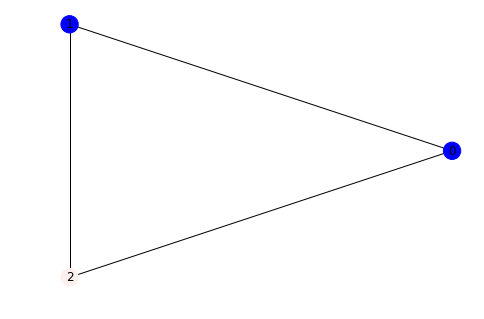

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 248
Es sind 4 Passagiere in der Bahn


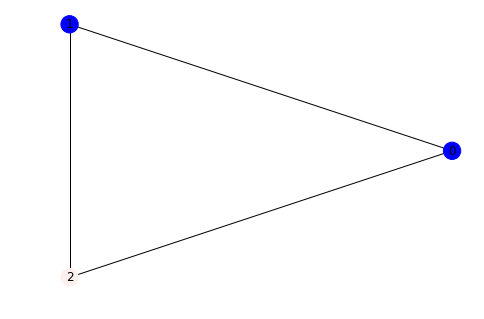

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 248
Es sind 3 Passagiere in der Bahn


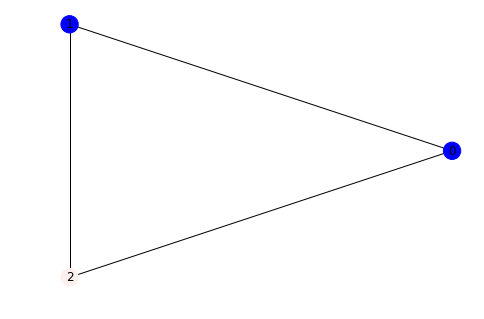

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 250
Es sind 2 Passagiere in der Bahn


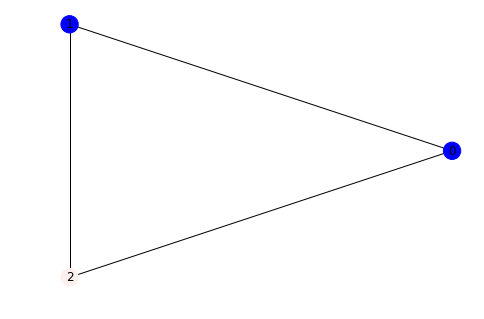

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 250
Es sind 1 Passagiere in der Bahn


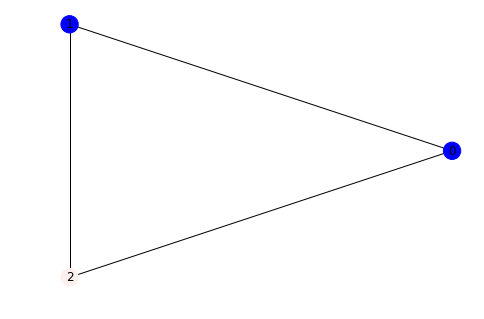

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 272
Passagier: {'station': 1, 'exit_time': 20}
time: 272
Passagier: {'station': 1, 'exit_time': 20}
time: 272
Passagier: {'station': 0, 'exit_time': 10}
time: 262


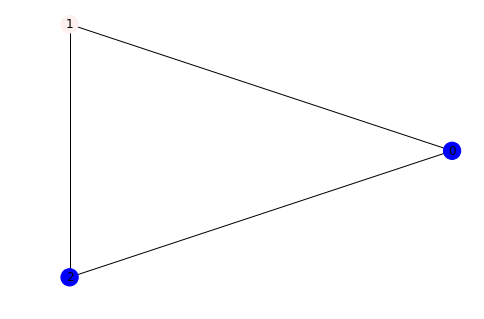

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 260
Es sind 4 Passagiere in der Bahn


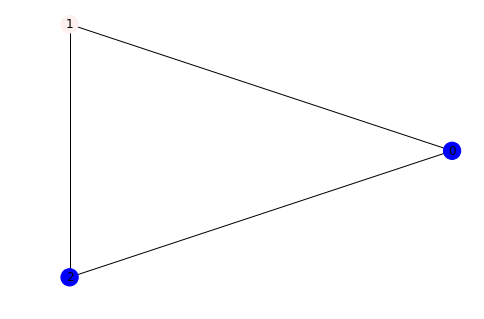

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 262
Es sind 3 Passagiere in der Bahn


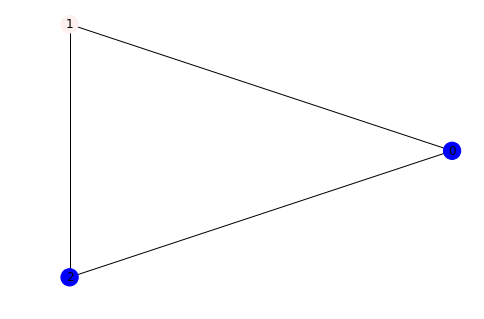

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0 load
Fahrzeug 0 hat 2 Plätze frei
Passagier: {'station': 0, 'exit_time': 20}
time: 284
Passagier: {'station': 2, 'exit_time': 10}
time: 274


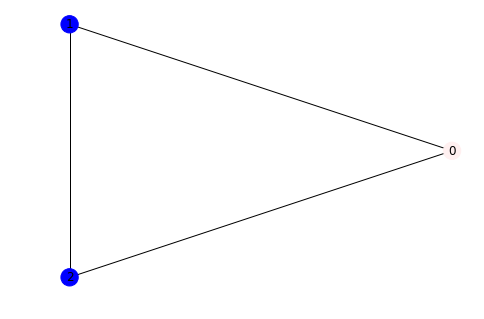

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 272
Es sind 4 Passagiere in der Bahn


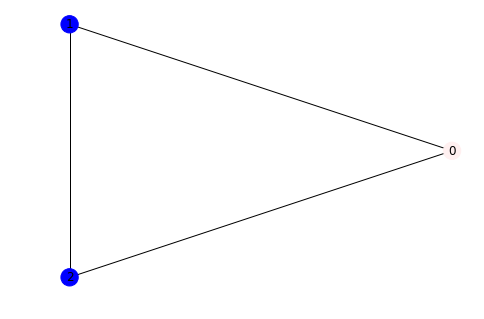

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 272
Es sind 3 Passagiere in der Bahn


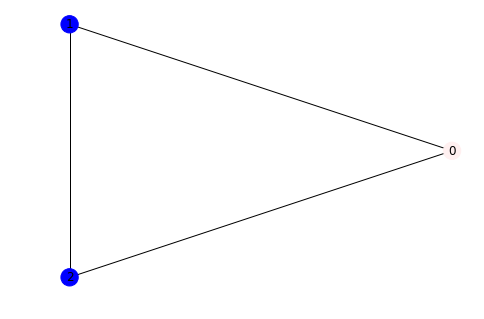

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 272
Es sind 2 Passagiere in der Bahn


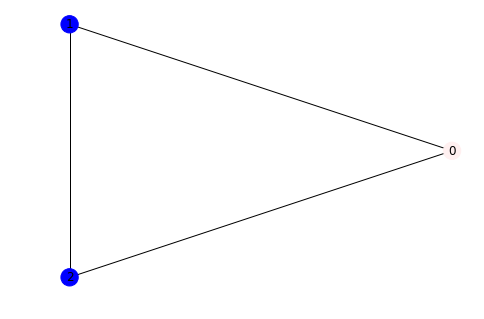

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 274
Es sind 1 Passagiere in der Bahn


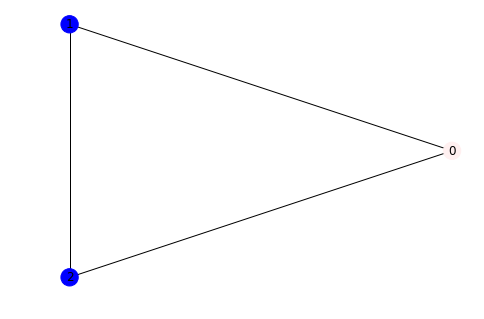

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 2, 'exit_time': 20}
time: 296
Passagier: {'station': 1, 'exit_time': 10}
time: 286
Passagier: {'station': 1, 'exit_time': 10}
time: 286
Passagier: {'station': 2, 'exit_time': 20}
time: 296


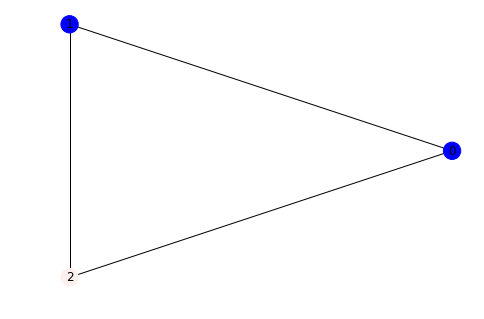

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 284
Es sind 4 Passagiere in der Bahn


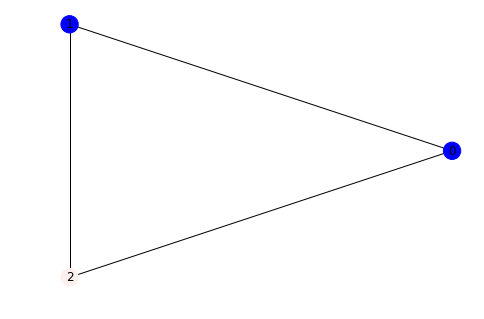

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 286
Es sind 3 Passagiere in der Bahn


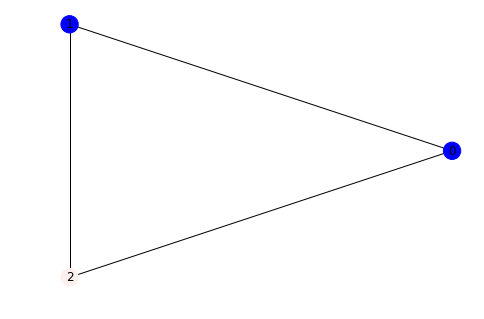

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 286
Es sind 2 Passagiere in der Bahn


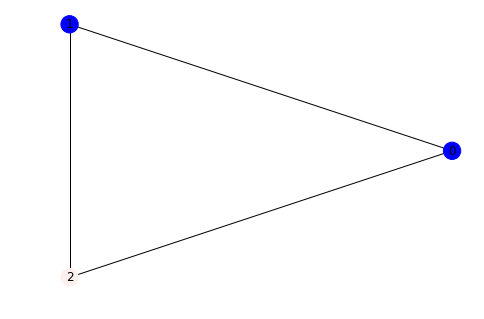

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 308
Passagier: {'station': 0, 'exit_time': 10}
time: 298
Passagier: {'station': 0, 'exit_time': 10}
time: 298


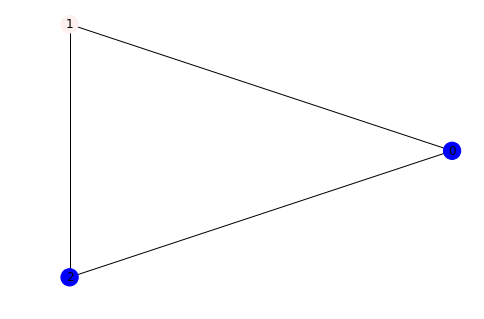

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 296
Es sind 4 Passagiere in der Bahn


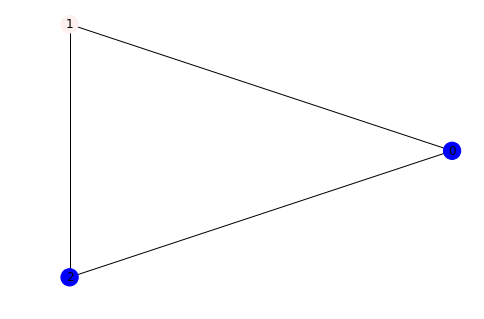

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 296
Es sind 3 Passagiere in der Bahn


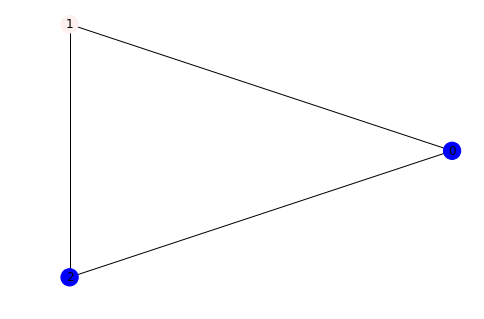

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 298
Es sind 2 Passagiere in der Bahn


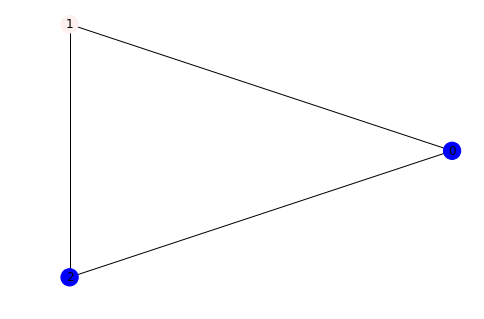

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 298
Es sind 1 Passagiere in der Bahn


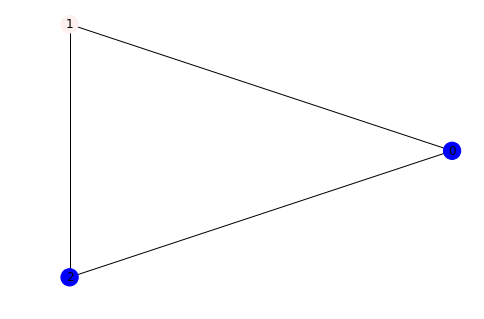

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 0, 'exit_time': 20}
time: 320
Passagier: {'station': 0, 'exit_time': 20}
time: 320
Passagier: {'station': 2, 'exit_time': 10}
time: 310
Passagier: {'station': 0, 'exit_time': 20}
time: 320


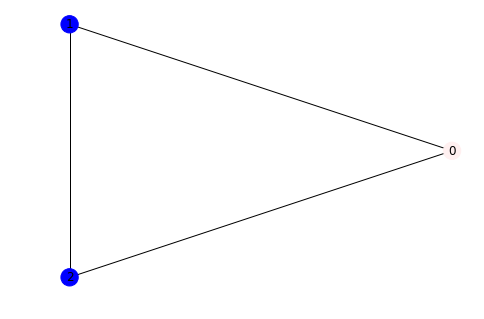

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 308
Es sind 4 Passagiere in der Bahn


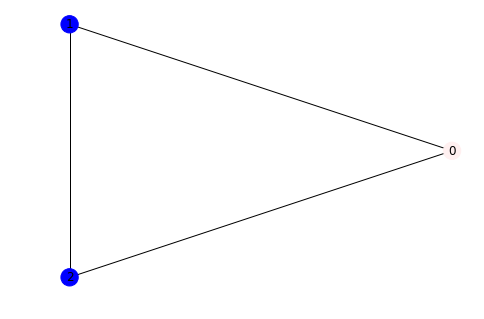

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 310
Es sind 3 Passagiere in der Bahn


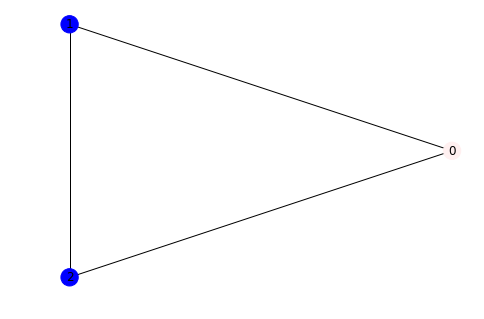

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0 load
Fahrzeug 0 hat 2 Plätze frei
Passagier: {'station': 2, 'exit_time': 20}
time: 332
Passagier: {'station': 2, 'exit_time': 20}
time: 332


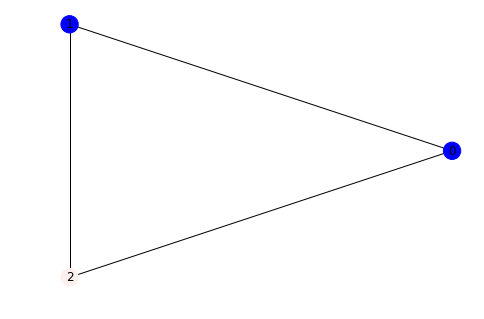

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 320
Es sind 4 Passagiere in der Bahn


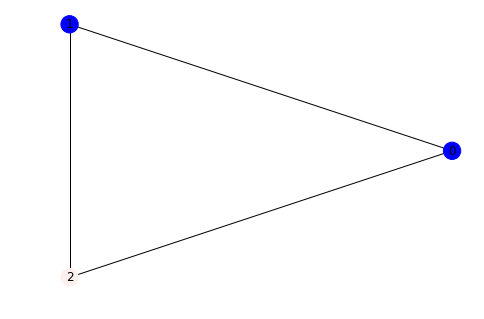

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 320
Es sind 3 Passagiere in der Bahn


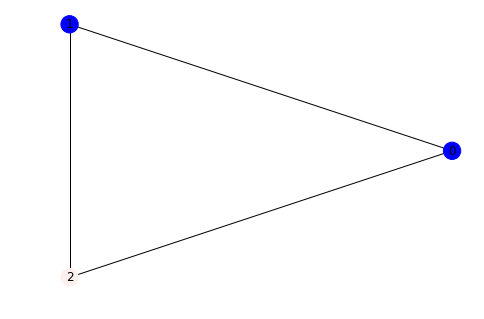

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 320
Es sind 2 Passagiere in der Bahn


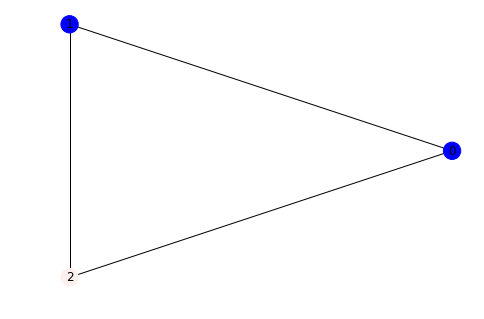

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 0, 'exit_time': 10}
time: 334
Passagier: {'station': 0, 'exit_time': 10}
time: 334
Passagier: {'station': 0, 'exit_time': 10}
time: 334


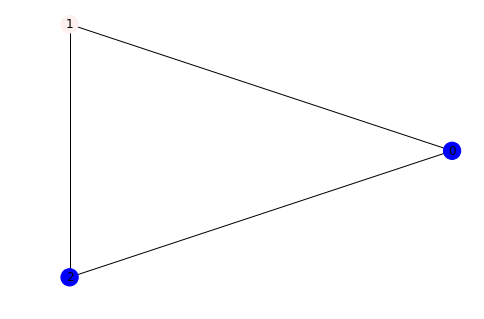

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 332
Es sind 4 Passagiere in der Bahn


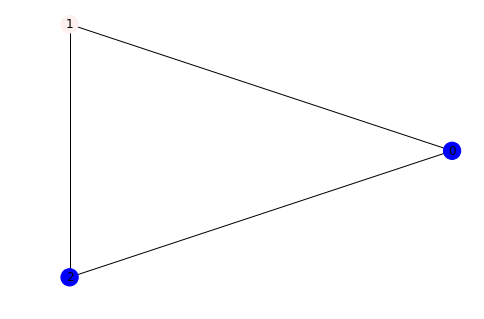

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 332
Es sind 3 Passagiere in der Bahn


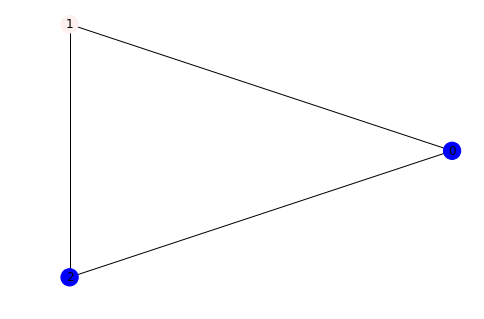

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 334
Es sind 2 Passagiere in der Bahn


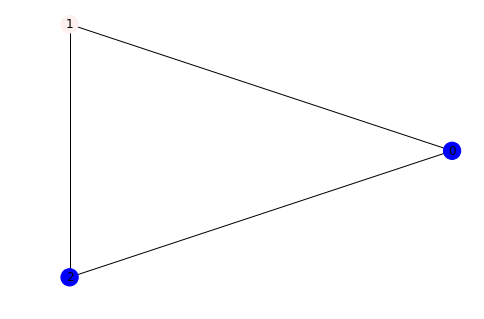

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 334
Es sind 1 Passagiere in der Bahn


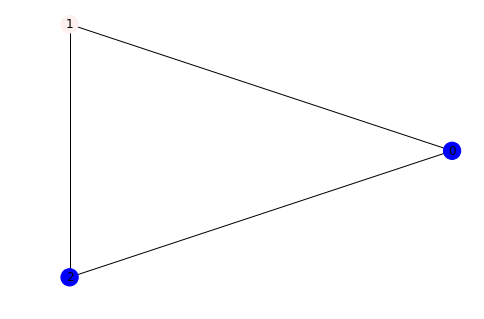

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 334
Es sind 0 Passagiere in der Bahn


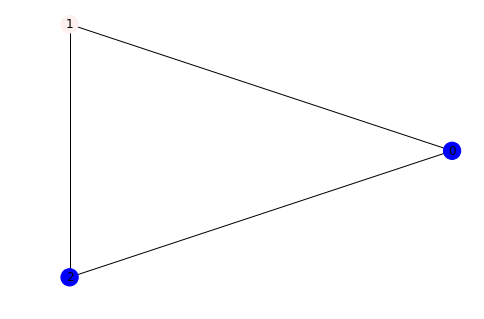

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0 load
Fahrzeug 0 hat 5 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 346
Passagier: {'station': 2, 'exit_time': 10}
time: 346
Passagier: {'station': 2, 'exit_time': 10}
time: 346
Passagier: {'station': 2, 'exit_time': 10}
time: 346
Passagier: {'station': 0, 'exit_time': 20}
time: 356


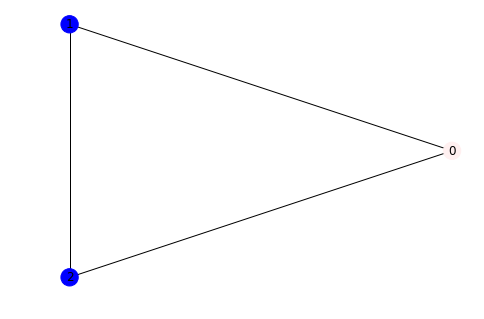

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 346
Es sind 4 Passagiere in der Bahn


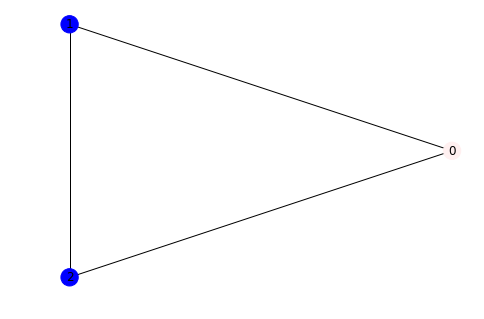

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 346
Es sind 3 Passagiere in der Bahn


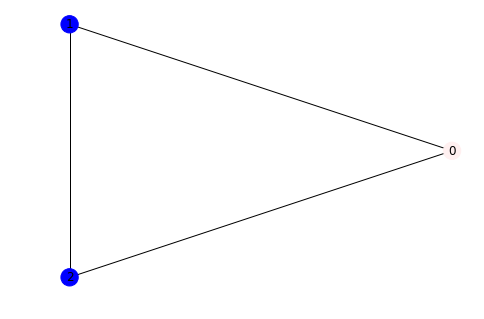

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 346
Es sind 2 Passagiere in der Bahn


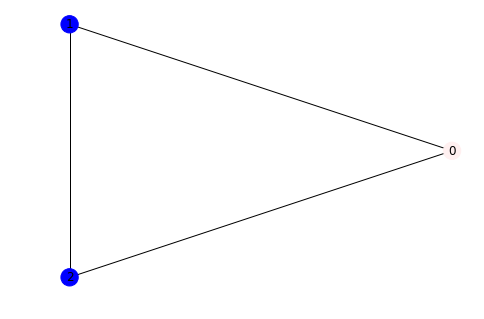

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 346
Es sind 1 Passagiere in der Bahn


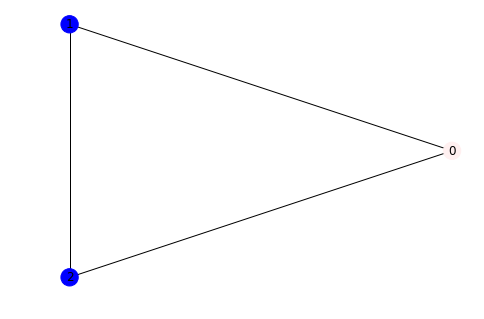

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 2, 'exit_time': 20}
time: 368
Passagier: {'station': 1, 'exit_time': 10}
time: 358
Passagier: {'station': 1, 'exit_time': 10}
time: 358
Passagier: {'station': 1, 'exit_time': 10}
time: 358


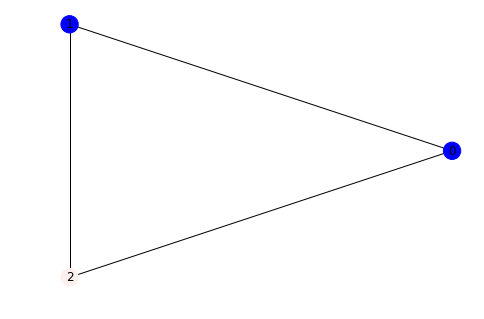

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 356
Es sind 4 Passagiere in der Bahn


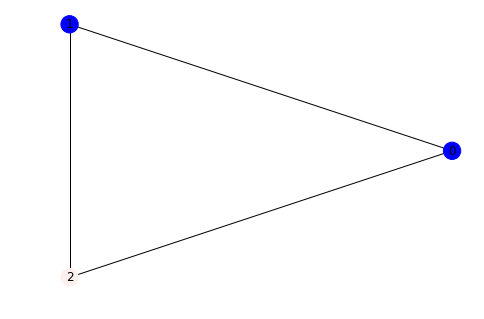

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 358
Es sind 3 Passagiere in der Bahn


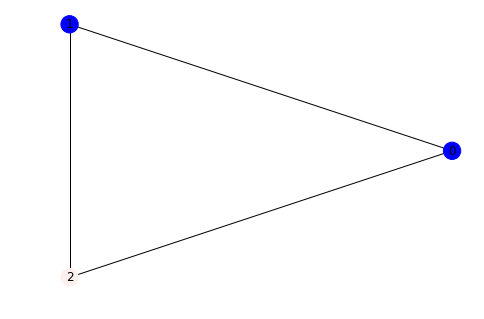

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 358
Es sind 2 Passagiere in der Bahn


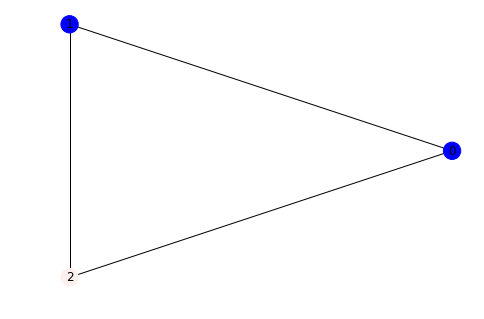

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 358
Es sind 1 Passagiere in der Bahn


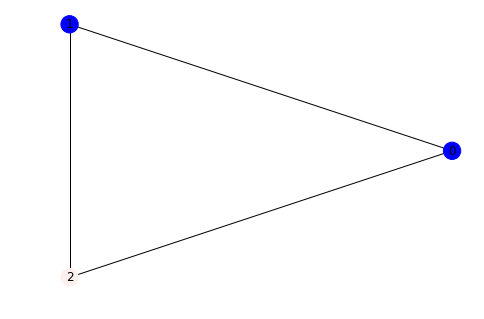

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 0, 'exit_time': 10}
time: 370
Passagier: {'station': 1, 'exit_time': 20}
time: 380
Passagier: {'station': 1, 'exit_time': 20}
time: 380
Passagier: {'station': 1, 'exit_time': 20}
time: 380


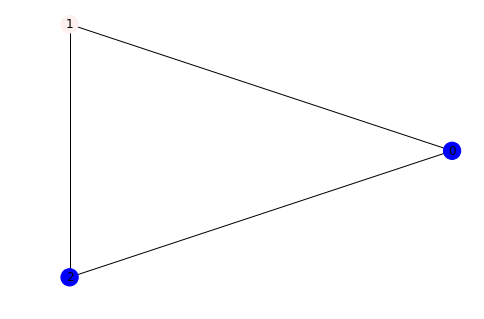

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 368
Es sind 4 Passagiere in der Bahn


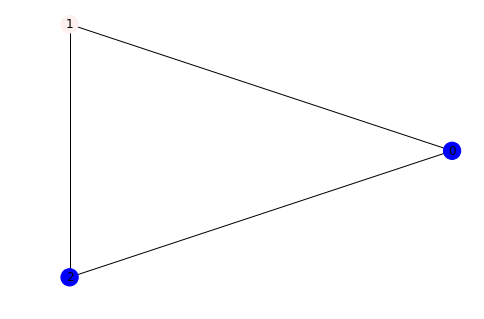

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 370
Es sind 3 Passagiere in der Bahn


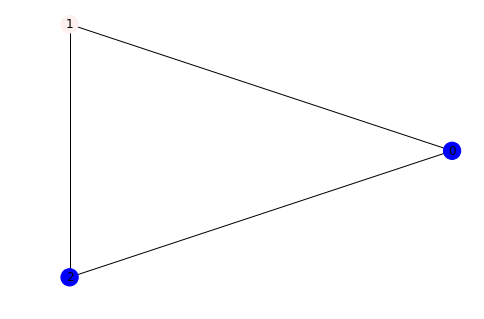

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0 load
Fahrzeug 0 hat 2 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 382
Passagier: {'station': 0, 'exit_time': 20}
time: 392


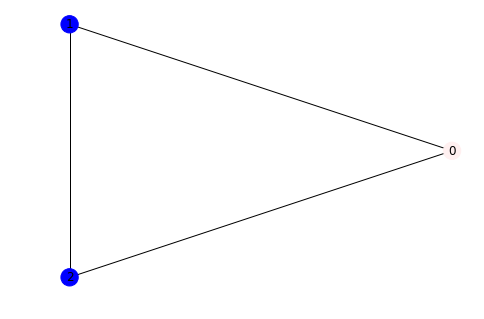

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 380
Es sind 4 Passagiere in der Bahn


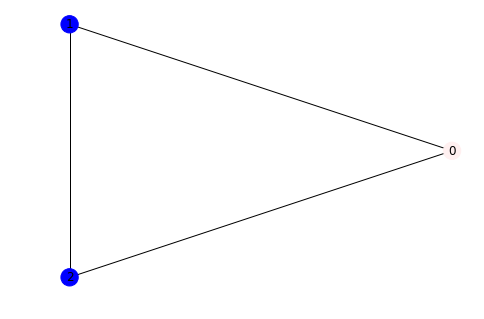

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 380
Es sind 3 Passagiere in der Bahn


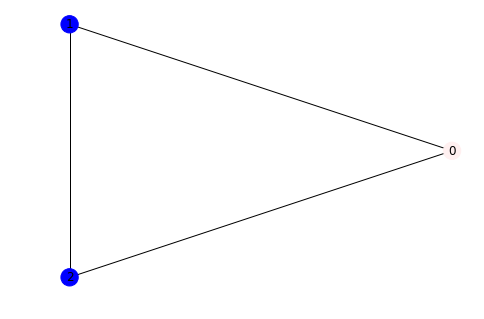

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 380
Es sind 2 Passagiere in der Bahn


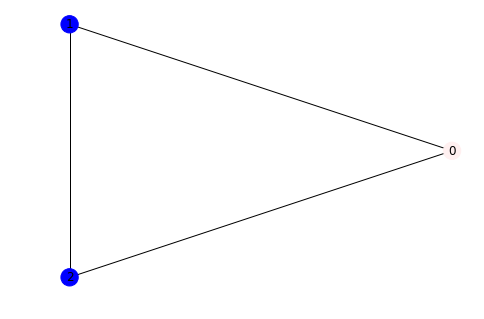

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 382
Es sind 1 Passagiere in der Bahn


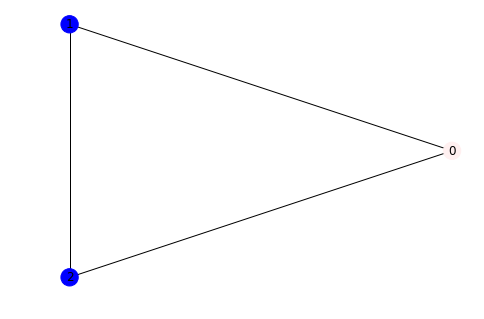

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 1, 'exit_time': 10}
time: 394
Passagier: {'station': 1, 'exit_time': 10}
time: 394
Passagier: {'station': 1, 'exit_time': 10}
time: 394
Passagier: {'station': 2, 'exit_time': 20}
time: 404


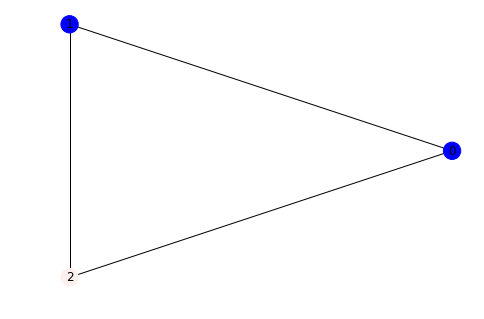

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 392
Es sind 4 Passagiere in der Bahn


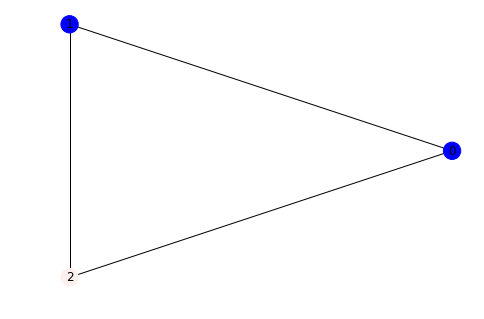

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 394
Es sind 3 Passagiere in der Bahn


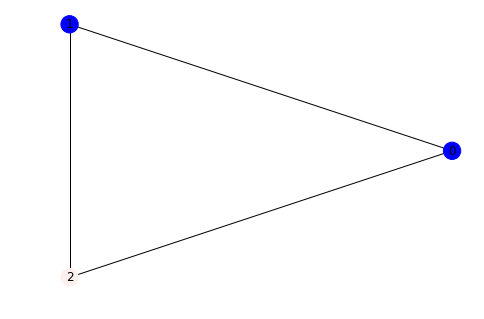

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 394
Es sind 2 Passagiere in der Bahn


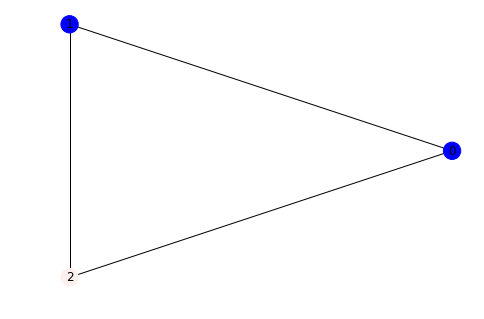

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 394
Es sind 1 Passagiere in der Bahn


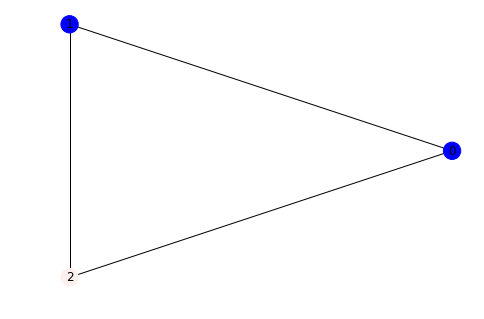

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 0, 'exit_time': 10}
time: 406
Passagier: {'station': 0, 'exit_time': 10}
time: 406
Passagier: {'station': 0, 'exit_time': 10}
time: 406


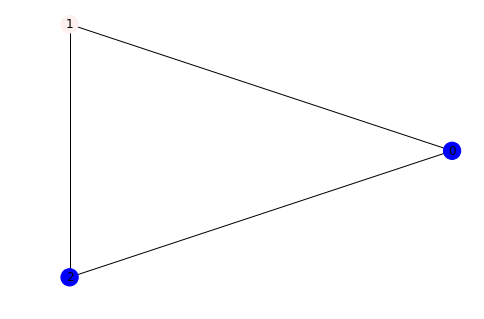

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 404
Es sind 3 Passagiere in der Bahn


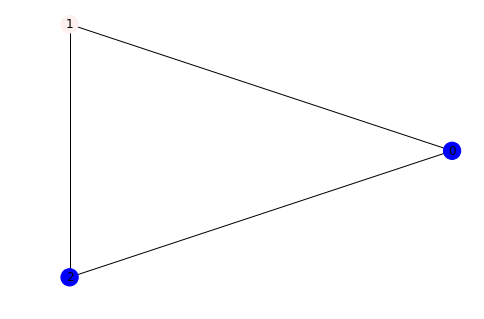

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 406
Es sind 2 Passagiere in der Bahn


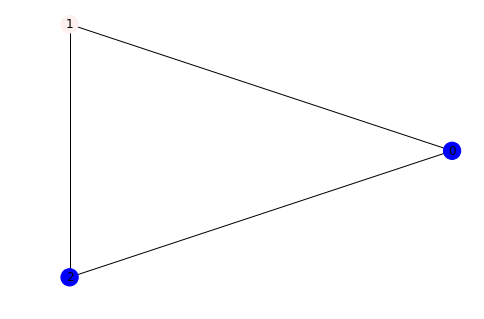

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 406
Es sind 1 Passagiere in der Bahn


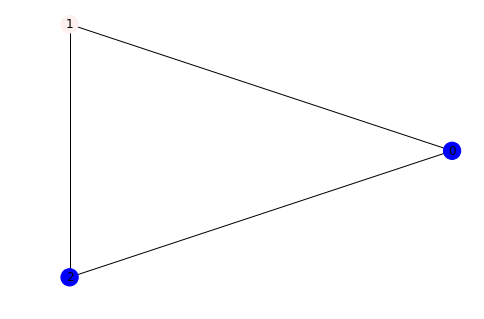

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 406
Es sind 0 Passagiere in der Bahn


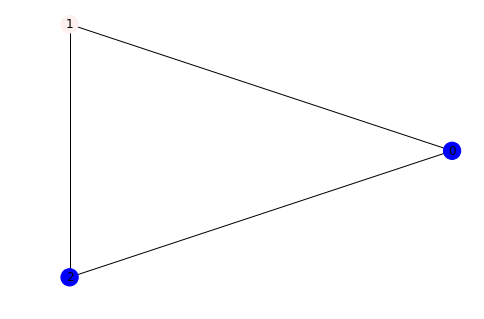

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0 load
Fahrzeug 0 hat 5 Plätze frei
Passagier: {'station': 2, 'exit_time': 10}
time: 418
Passagier: {'station': 2, 'exit_time': 10}
time: 418
Passagier: {'station': 2, 'exit_time': 10}
time: 418
Passagier: {'station': 0, 'exit_time': 20}
time: 428
Passagier: {'station': 0, 'exit_time': 20}
time: 428


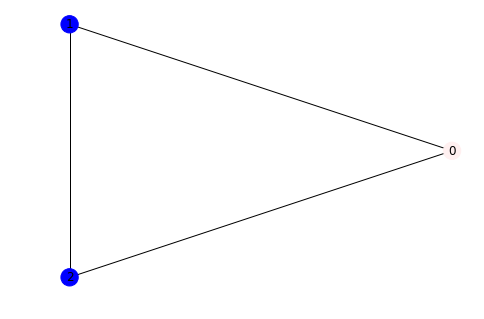

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 418
Es sind 4 Passagiere in der Bahn


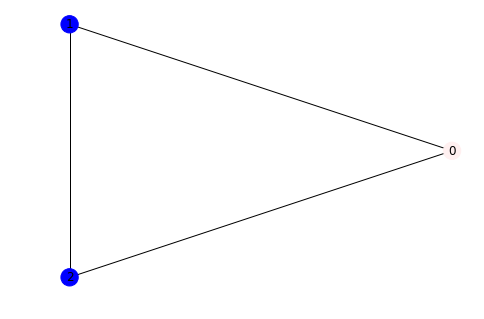

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 418
Es sind 3 Passagiere in der Bahn


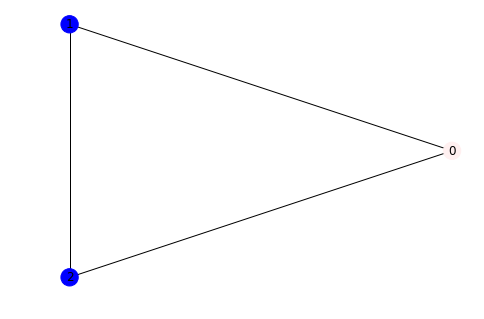

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 418
Es sind 2 Passagiere in der Bahn


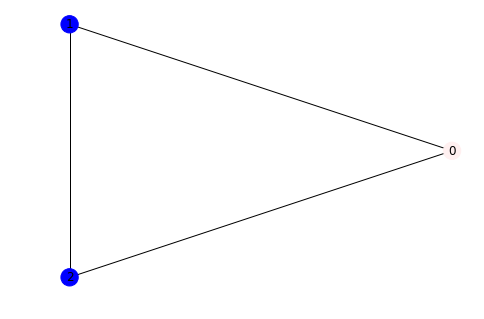

Fahrzeug 0 ist am Knoten 0, der nächste Halt 2
Fahrzeug 0 load
Fahrzeug 0 hat 3 Plätze frei
Passagier: {'station': 2, 'exit_time': 20}
time: 440
Passagier: {'station': 1, 'exit_time': 10}
time: 430
Passagier: {'station': 1, 'exit_time': 10}
time: 430


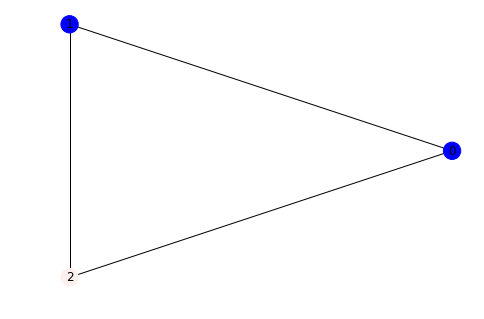

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 428
Es sind 4 Passagiere in der Bahn


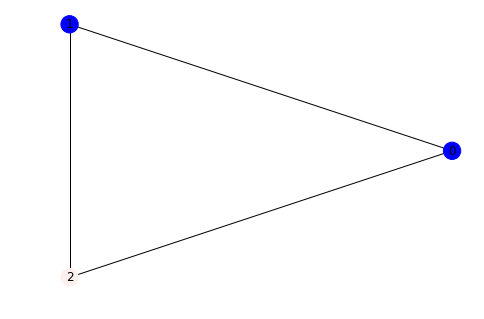

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 428
Es sind 3 Passagiere in der Bahn


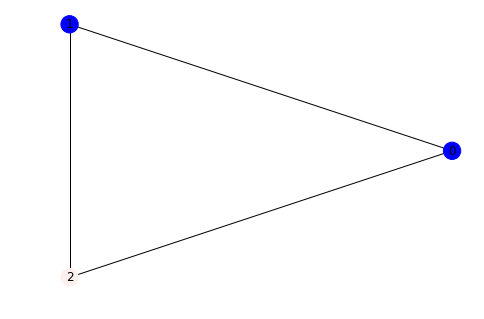

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 430
Es sind 2 Passagiere in der Bahn


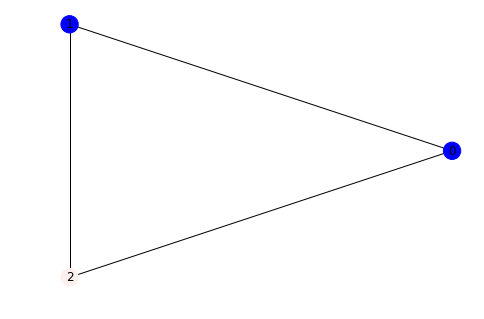

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 430
Es sind 1 Passagiere in der Bahn


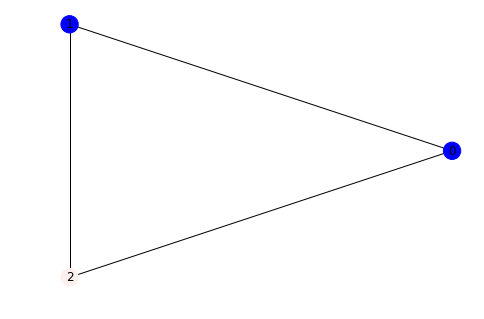

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei


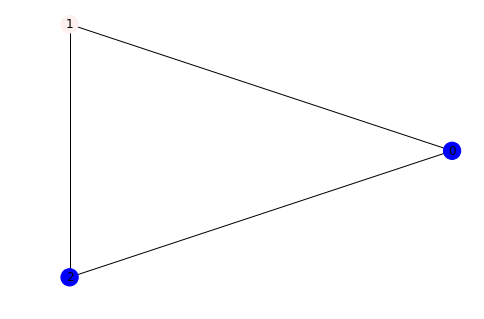

Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0, Passagiere steigenaus, time 440
Es sind 0 Passagiere in der Bahn
Ende


In [6]:
solve(eventq, passengers, bms)

passengers = [#
    [{'station': 'Bism', 'exit_time': 10}]*100 + [{'station': 'Uni', 'exit_time': 20}]*100,#
    [{'station': 'Phil', 'exit_time': 20}]*1000 + [{'station': 'Uni', 'exit_time': 10}]*20,#
    [{'station': 'Phil', 'exit_time': 10}]*10 + [{'station': 'Bism', 'exit_time': 20}]*1000#
              ]#
bms = [{'n_passengers': 0, 'capacity': 31, 'stop': 0, 'itinerary': ['Uni', 'Bism', 'Phil', 'Bism'], 'name': 0, 't_times': [12, 12, 12]},
       {'n_passengers': 0, 'capacity': 20, 'stop': 0, 'itinerary': ['Phil', 'Bism', 'Uni', 'Bism'], 'name': 1, 't_times': [12, 12, 12]}]

# shuffle passengers
shuffle0(passengers)



event0 = Event(0,'load',0)
event1 = Event(0,'load',1)
eventq = []
hq.heappush(eventq, event0)
hq.heappush(eventq, event1)
print(eventq)